# **Bank Customer Churn Analysis**

## **Goal**
_In this project I will explore customer data to understand what factors contribute to customer churn. I will perform data exploration, visualization, and summarize key insights!_

**Dataset:**  
_Bank churn dataset (10,000 customers).  
Each record includes demographic and financial information._

This notebook performs an Exploratory Data Analysis (EDA) on a bank’s customer churn dataset.  
The analysis follows a structured process to clean, explore, and visualize the data to uncover the main drivers of churn.

1. **Data Loading** – Import the dataset and inspect its shape, structure, and key variables.

2. **Exploratory Data Analysis (EDA)**  
   - **Data Cleaning:** Handle missing values, duplicates, and inconsistent data types.  
   - **Correlation Analysis:** Identify which variables are most strongly associated with churn.
   - **Feature Transformation:** Group or label variables for comparison.  
   - **Descriptive Analysis:** Generate summary statistics to understand customer profiles.  
   - **Visualization:** Explore distributions and patterns across variables.  
   
3. **Insight Generation** – Interpret findings to highlight customer segments with higher churn risk and suggest data-driven insights.

4. **Power BI Dashboard** – Complement the Python analysis by processing and visualizing categorical variables in an interactive dashboard.  

## **Setup**
**Importing the necessary libraries for this project**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Data Overview**

In [22]:
churn = pd.read_csv("../data/churn.csv", index_col='CustomerId')
churn.shape

(10000, 13)

This dataset has 10000 observations and 13 variables.

In [23]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [24]:
churn.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [25]:
churn.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Exploratory Data Analysis**

**Cleaning the data**

In [26]:
#Checking for missing data
print(churn.isna().sum())
churn.drop_duplicates(inplace=True)

RowNumber          0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


There are no null or NA values, and any duplicate records have been removed from the dataset. We can now proceed to exploratory data analysis (EDA) to better understand the features and their relationship with customer churn.

**Churn overview**

Churn Rate: 20.37%


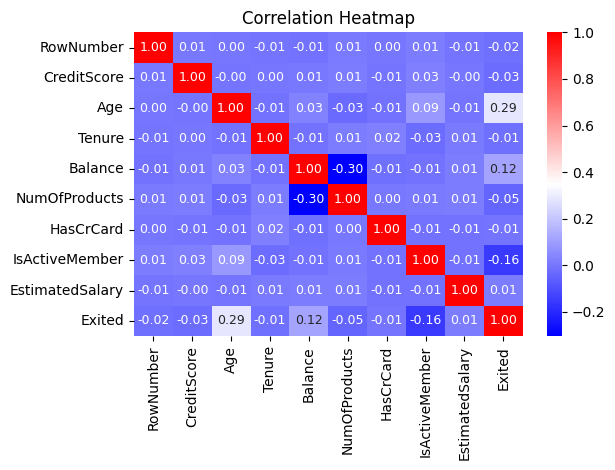

In [27]:
#Churn overview
churn_rate = churn['Exited'].value_counts(normalize=True) * 100
print(f"Churn Rate: {churn_rate[1]:.2f}%")

# Explore the correlation between numerical features and churn
correlation = churn.corr(numeric_only=True)
sns.heatmap(correlation,annot=True,fmt=".2f",cmap='bwr',annot_kws={"size": 9})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Based on the churn rate and the correlation analysis between numerical features and churn, we can draw some insights:

- **Overall Churn Rate:** 20.37%  
  Approximately 20 out of every 100 customers have stopped using the bank's services. This is a notable proportion, underlying the need of analyzing the factors driving churn and building predictive models to anticipate future churn.

- **Correlation with Exited (Churn) variable:**  
  - **Age:** Positive correlation of 0.29 (most significant among numerical features)  
  -> Older customers are more likely to churn.  
  - **IsActiveMember:** Negative correlation of −0.16 (most significant negative correlation)  
  -> Inactive members (IsActiveMember = 0) have a higher probability of leaving.  
  - **Balance:** Weak positive correlation of 0.12  
  -> Customers with higher account balances are slightly more likely to churn.  
  - **Other variables:** Correlation coefficients are close to 0  
  -> These variables show very weak linear relationships with churn.

> Overall, the correlations between numerical features and churn are generally moderate or negligible, suggesting that most variables have limited linear relationships with customer churn. **Age**, **IsActiveMember**, **Balance** are the most influential features for churn among numeric/binary variables, and should be the focus for retention strategies.

**Analyzing customer churn by age**

Age statistics by Churn status:
         mean    std   min   max
Exited                          
0       37.41  10.13  18.0  92.0
1       44.84   9.76  18.0  84.0


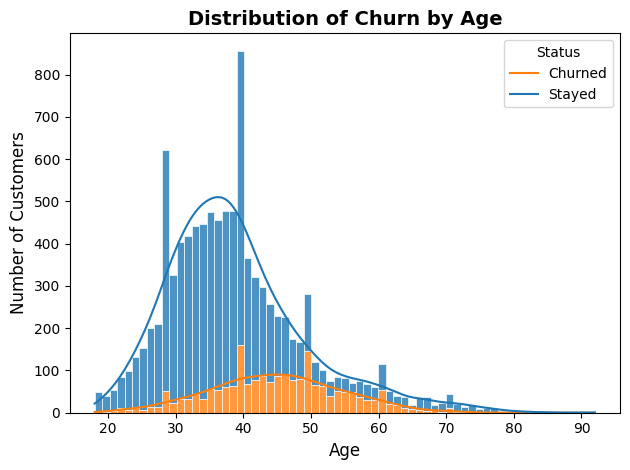

In [28]:
#Descriptive satistics of churn by age
age_summary = churn.groupby('Exited')['Age'].describe()[['mean', 'std', 'min','max']].round(2)
print("Age statistics by Churn status:", age_summary, sep="\n")

#Distribution of churn by age
sns.histplot(data = churn, x='Age', hue='Exited',kde=True, stat='count',multiple='stack',alpha=0.8,edgecolor='white')
plt.title('Distribution of Churn by Age',fontsize=14,fontweight='bold')
plt.xlabel('Age',fontsize=12)
plt.ylabel('Number of Customers',fontsize=12)
plt.legend(title='Status', labels=['Churned', 'Stayed'])
plt.tight_layout()
plt.show()


Based on the distribution analysis and descriptive statistics between age and churn, we can draw some insights:

- **Distribution Analysis:**
  - **Loyal Customers (Exited = 0)**: This group is predominantly younger. The histogram shows a large concentration of loyal customers peaking around 35-40 years old. 
  - **Churned Customers (Exited = 1)**: This group skews significantly older. The histogram's peak for churners is visibly later, concentrated around 40-50 years old.

- **Statistical analysis:** the mean age for customers who churned is around 44.8 years, which is over 7 years older than the mean age of around 37.4 years for customers who stayed.

> Overall, some key ingishts can be summarized:
  - The highest likelihood of churn occurs when customers are in their 40s to 50s. This is the primary demographic for churn.
  - The core of the loyal customer base is younger, primarily under 40.

  -> A proactive strategy should be implemented to engage with customers as they approach the **40-year-old mark**. This could include loyalty programs, special offers, or check-in calls to address potential dissatisfaction before they decide to leave.

**Analyzing customer churn by activity status**

Churn statistics by Activity status:
                Total Customers  Churn Rate  Stayed Rate
IsActiveMember                                          
0                          4849        0.27         0.73
1                          5151        0.14         0.86


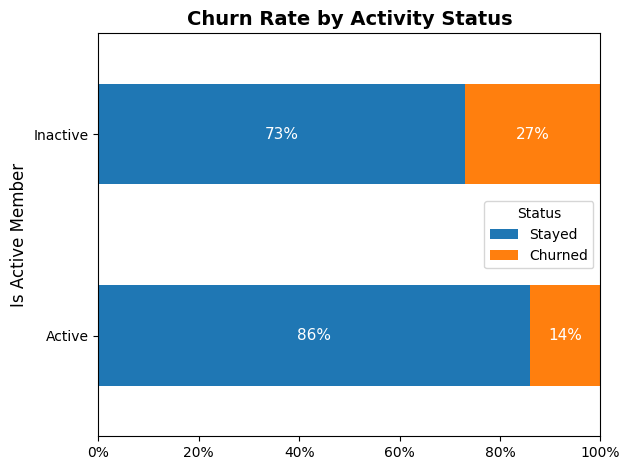

In [29]:
#Descriptive satistics of churn by activity status
activity_summary = churn.groupby('IsActiveMember')['Exited'].agg(['count', 'mean']).round(2)
activity_summary['Stayed Rate']=1 - activity_summary['mean']
activity_summary.rename(columns={'count': 'Total Customers', 'mean': 'Churn Rate'}, inplace=True)
print("Churn statistics by Activity status:", activity_summary, sep="\n")

#Convert rates to percentages (each group totals 100%)
activity_perc = activity_summary[['Stayed Rate','Churn Rate']]*100

#Horizontal stacked bar plot of churn by activity status
ax=activity_perc.plot(kind='barh', stacked=True)
plt.title('Churn Rate by Activity Status',fontsize=14,fontweight='bold')
plt.ylabel('Is Active Member',fontsize=12)
ax.set_yticks([0,1], labels=['Inactive','Active'])
plt.legend(title='Status', labels=['Stayed', 'Churned'])

#Inver y-axis to have inactive members on top
ax.invert_yaxis()
#Limit x-axis to 0-100%
plt.xlim(0, 100)
#Format x-axis as percentages
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

#Show percentages on bars
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(p.get_x() + width / 2, p.get_y() + p.get_height() / 2,
                f'{int(width)}%', ha='center', va='center', color='white', fontsize=11)
                
plt.tight_layout()
plt.show()


Based on the horizontal stacker bar plot and descriptive statistics between activity status and churn, we can draw some insights:

- **Inactive Customers**: Although both groups are relatively similar in size, this group shows a notably higher churn rate of 27%. The lack of regular activity or engagement suggests these customers are more likely to leave the bank, possibly due to weak relationship maintenance.
- **Active Customers**: This group demonstrates a much lower churn rate of 14%, indicating that consistent engagement and activity correlate with customer retention.


> Overall, some key ingishts can be summarized:
  - Inactive customers represent the primary churn risk group, with nearly twice the churn rate of active members.
  - Customers who regularly interact with their accounts or services are less likely to leave.

  -> A retention strategy should be developed to re-engage inactive members. This could include personalized campaigns, reminders, or rewards for activity to enhance the relationship between customers and the bank.

Balance statistics by Churn status:
            mean       std  min        max
Exited                                    
0       72745.30  62848.04  0.0  221532.80
1       91108.54  58360.79  0.0  250898.09
Churn statistics by Balance group:
                Total Customers  Churn Rate  Stayed Rate
BalanceGroup                                            
Zero Balance               3617        0.14         0.86
Low Balance                2107        0.21         0.79
Medium Balance             2169        0.27         0.73
High Balance               2107        0.23         0.77


C:\Users\admin\AppData\Local\Temp\ipykernel_8616\2911190607.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_group_summary = churn.groupby('BalanceGroup')['Exited'].agg(['count', 'mean']).round(2)


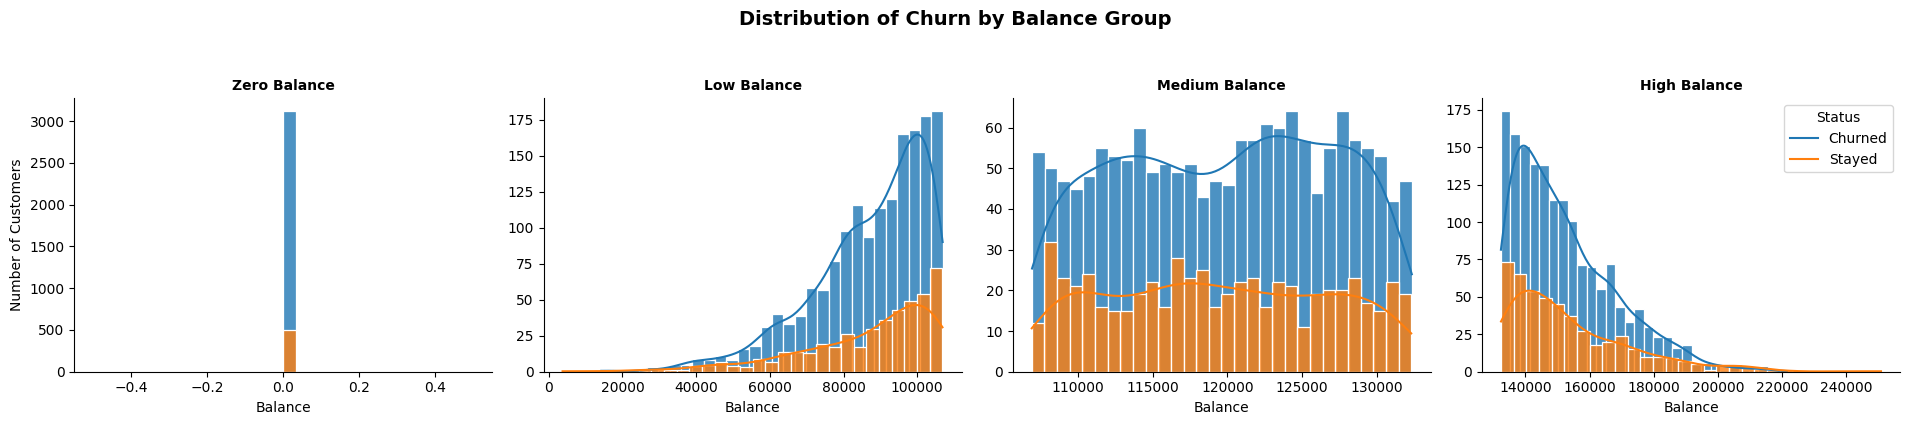

In [30]:
#Descriptive satistics of churn by balance
balance_summary = churn.groupby('Exited')['Balance'].describe()[['mean', 'std', 'min','max']].round(2)
print("Balance statistics by Churn status:", balance_summary, sep="\n")

#Grouping zero balance separately and dividing the rest into three equal groups
q1 = churn[churn['Balance'] > 0]['Balance'].quantile(0.33)
q2 = churn[churn['Balance'] > 0]['Balance'].quantile(0.67)
max_balance = churn['Balance'].max()

#Define bins and labels
balance_bins = [-1, 0, q1, q2, max_balance]
balance_labels = ['Zero Balance', 'Low Balance', 'Medium Balance', 'High Balance']
churn['BalanceGroup'] = pd.cut(churn['Balance'], bins=balance_bins, labels=balance_labels)

#Descriptive satistics of churn by balance group
balance_group_summary = churn.groupby('BalanceGroup')['Exited'].agg(['count', 'mean']).round(2)
balance_group_summary['Stayed Rate']=1 - balance_group_summary['mean']
balance_group_summary.rename(columns={'count': 'Total Customers', 'mean': 'Churn Rate'}, inplace=True)
print("Churn statistics by Balance group:", balance_group_summary, sep="\n")


#Distribution of churn by balance group
g = sns.FacetGrid(churn, col='BalanceGroup', hue='Exited',
                  sharex=False, sharey=False, height=4, aspect=1.2)
g.map(sns.histplot, 'Balance', bins=30, multiple='stack', kde=True, alpha=0.8, edgecolor='white')
g.set_titles("{col_name}", fontsize=12, fontweight='bold')
g.set_axis_labels('Balance', 'Number of Customers')
g.fig.suptitle('Distribution of Churn by Balance Group', fontsize=14, fontweight='bold', y=1.05)
plt.legend(title='Status', labels=['Churned', 'Stayed'])
plt.tight_layout()
plt.show()


Based on the distribution plots and descriptive statistics across different balance groups, we can draw some insights:

- **Zero Balance Customers (3617 customers)**: 
  - Customers with no funds in their accounts form the largest portion of the base accounting for over one-third of all customers.
  - Despite their inactivity, this group has a churn rate of only 14%, significantly lower than other groups. This suggests that many zero balance customers maintain accounts with minimal engagement but do not close them. 
  - Their behaviour reflects passive retention rather than active loyalty.
- **Low Balance Customers (2107 customers)**: 
  - With balances mostly between £0 and £100,000, this group shows a churn rate of 21%. This marks the first sharp rise in churn as balances increase from zero.
  - These customers might be moderately active but are more likely to switch banks due to perceived low returns or service dissatisfaction.
- **Medium Balance Customers (2169 customers)**: 
  - Customers in this category maintain balances around £110,000–£130,000 and show the highest churn rate of 27%.
  - Despite holding significant balances, these customers are the most likely to leave
  - This segment represents a high-value yet high-risk group, where retention initiatives can yield the greatest impact.
- **High Balance Customers (2107 customers)**: 
  - Customers with balances above £140,000 exhibit a churn rate of 23%, slightly lower than the medium group but still substantial.
  - Although they are fewer in number, their financial value is much higher, and any loss from this segment has a large business impact.
  - These customers may be wealthy and well-informed, managing multiple banking relationships or shifting funds between different banks for better investment opportunities.


> Overall, some key ingishts can be summarized:
  - Churn shows a non-linear trend, which is increasing from low to medium balances, then slightly declining at high balances.
  - Zero balance customers showing low risk but low profit retention.
  - High value customers (medium and high balance) contribute disproportionately to churn losses, even though they form a smaller proportion of the total base.

  -> Targeted retention strategies should prioritise medium and high balance customers. Despite they are representing a smaller share of the base, they actually contribute most to churn losses. These strategies can conduct through personalised engagement, loyalty rewards or premium financial support.

### Analysis by Categorical Variables: Gender and Geography

The churn analysis by *Gender* and *Geography* will be explored in **Power BI** 
to take advantage of its interactive dashboards and visual segmentation features. 
This complements the Python-based findings by offering a clearer view 
of demographic and regional churn patterns.